# DataViz
## storytelling com dados

Este notebook tem o objetivo de apresentar alguns exemplos de gráficos próximos aos apresentados no livro de **Cole Nussbaumer Knaflic**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [2]:
plt.rcParams['figure.dpi'] = 140
plt.rcParams['figure.figsize'] = (10, 8)

## Gráfico 1: Introdução

### *Favor aprovar a contratação de 2 ETIs*

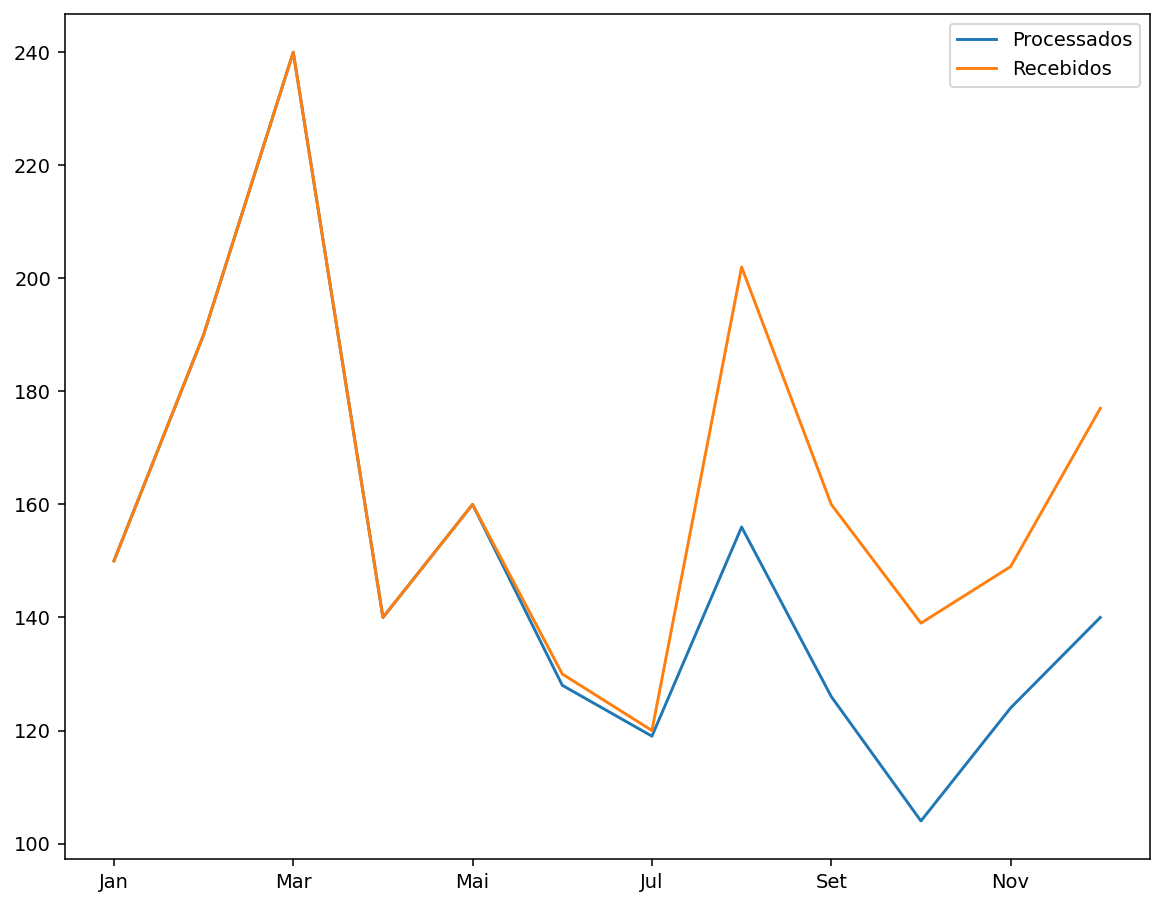

In [3]:
data = {
    'Processados': [150, 190, 240, 140, 160, 128, 119, 156, 126, 104, 124, 140],
    'Recebidos': [150, 190, 240, 140, 160, 130, 120, 202, 160, 139, 149, 177],
}
data_index = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
df = pd.DataFrame(data, index=data_index)
df.plot();

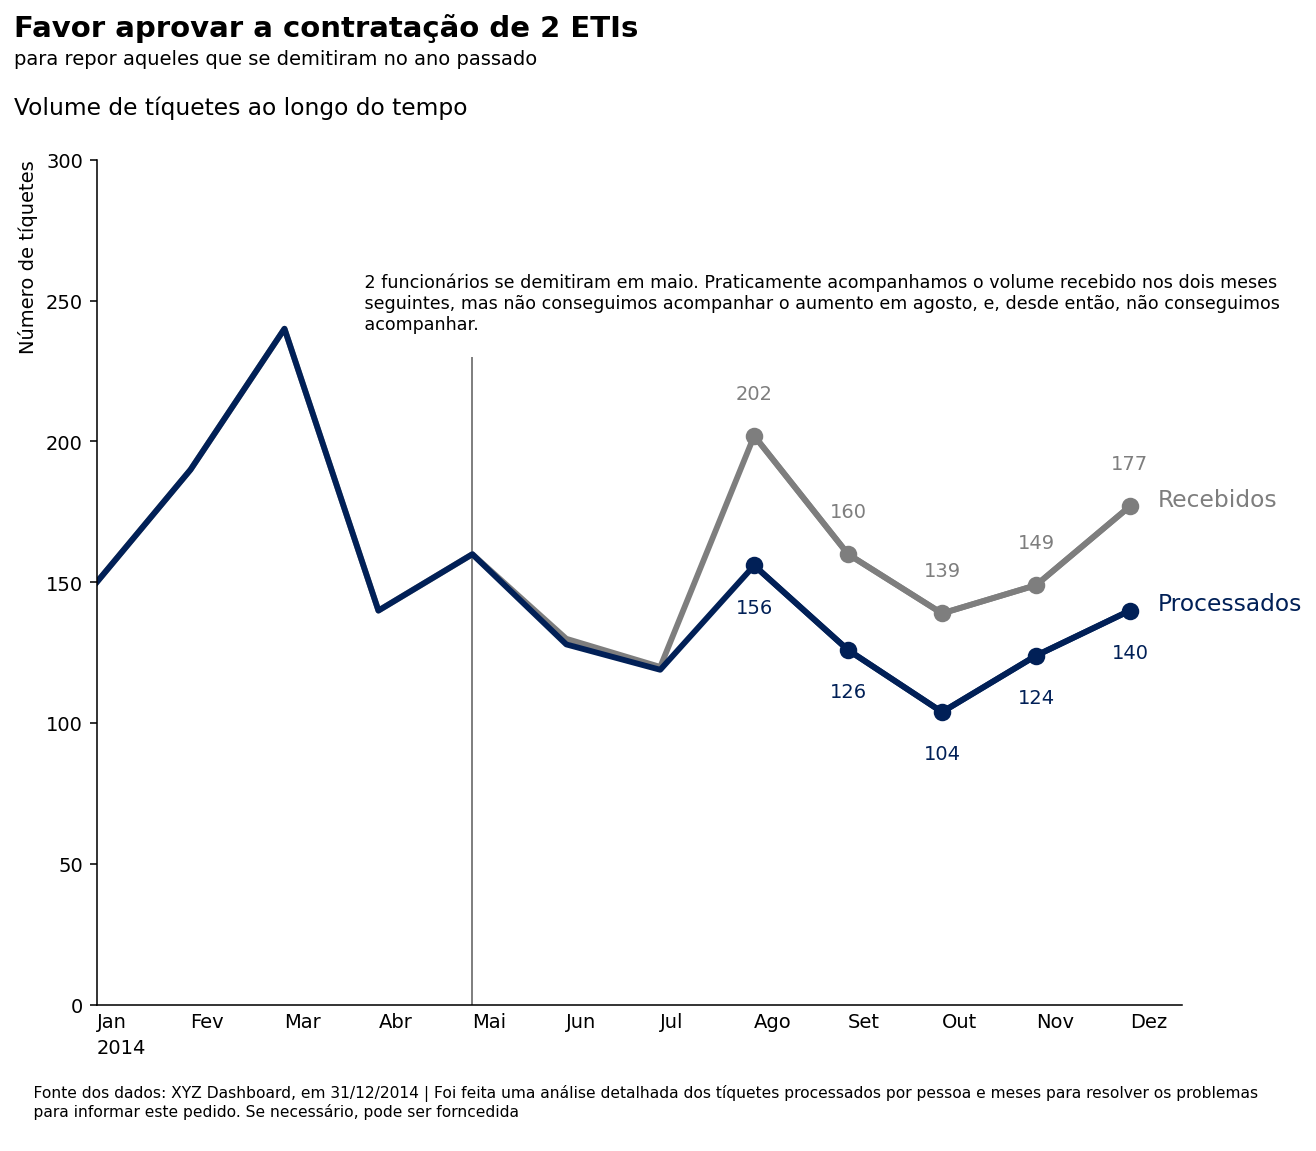

In [4]:
fig, ax = plt.subplots()
fig.text(x=0.066, y=.99, s='Favor aprovar a contratação de 2 ETIs', fontweight='bold', fontsize=15)
fig.text(x=0.066, y=.965, s='para repor aqueles que se demitiram no ano passado', fontsize=10)
fig.text(x=0.066, y=.92, s='Volume de tíquetes ao longo do tempo', fontsize=12)
text = """
    2 funcionários se demitiram em maio. Praticamente acompanhamos o volume recebido nos dois meses
    seguintes, mas não conseguimos acompanhar o aumento em agosto, e, desde então, não conseguimos
    acompanhar.
    """
fig.text(x=.3, y=.71, s=text, fontsize=9, ha='left')
gray = '#7e7e7e'
blue = '#012057'

ax.plot(data_index, data['Recebidos'], color=gray, lw=3)
ax.plot(data_index, data['Processados'], color=blue, lw=3)

ax.plot(data_index[7:], data['Recebidos'][7:], lw=3, color=gray, marker='o', ms=8)
ax.plot(data_index[7:], data['Processados'][7:], lw=3, color=blue, marker='o', ms=8)

ax.vlines(x='Mai', ymin=0, ymax=230, color=gray, ls='-', lw=1)

for i, index in enumerate(data_index[7:]):    
    recebido = data['Recebidos'][7 + i]
    processados = data['Processados'][7 + i]
    ax.annotate(f"{recebido}", xy=(index, recebido + 15), color=gray,
                va='center', ha='center')
    ax.annotate(f"{processados}", xy=(index, processados - 15), color=blue,
                va='center', ha='center')

ax.annotate('Processados', xy=(11.3, data['Processados'][-1]), color=blue, fontsize=12)
ax.annotate('Recebidos', xy=(11.3, data['Recebidos'][-1]), color=gray, fontsize=12)

ax.set_ylabel('Número de tíquetes', loc='top')
ax.set_xlabel('2014', loc='left')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

y_ticks = np.arange(0, 350, 50)
ax.set_yticks(y_ticks)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_xticklabels(data_index, ha='left')
text = """
    Fonte dos dados: XYZ Dashboard, em 31/12/2014 | Foi feita uma análise detalhada dos tíquetes processados por pessoa e meses para resolver os problemas
    para informar este pedido. Se necessário, pode ser forncedida
    """
fig.text(x=0.066, y=.01, s=text, fontsize=8);

É possível utilizar LaTEX no matplotlib. Nesse caso, podemos inserir as linhas:
```python
from matplotlib import rc
rc('text', usetex=True)
```